In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import geopandas
from mpl_toolkits.axes_grid1 import make_axes_locatable
import contextily as ctx

In [233]:
#load earthquake data from 1950-2020
locmag = pd.read_csv('./datasets/eq_data.csv')

# convert time to pandas datetime
locmag['time'] = pd.to_datetime(locmag['time'])

# read in faults
faults = geopandas.read_file('Qfaults/QFaults.shp')
faults = faults[(faults['age']=='latest Quaternary') & (faults['Location']=='California')].to_crs(epsg=3857)

In [234]:
locmag.head().T

0  \
time             2020-01-29 17:33:47.010000+00:00   
latitude                                       34   
longitude                                -116.447   
depth                                        9.59   
mag                                          2.55   
magType                                        ml   
nst                                            76   
gap                                            39   
dmin                                       0.0671   
rms                                          0.14   
net                                            ci   
id                                     ci39286000   
updated                  2020-01-29T19:51:43.302Z   
place            7km NE of Desert Hot Springs, CA   
type                                   earthquake   
horizontalError                              0.12   
depthError                                   0.26   
magError                                    0.139   
magNst                                        109   
status                                   reviewed   
locationSource                                 ci   
magSource                                      ci   

                                                1  \
time             2020-01-22 07:41:10.790000+00:00   
latitude                                  34.3005   
longitude                                -118.486   
depth                                        7.72   
mag                                           3.6   
magType                                        ml   
nst                                           193   
gap                                            20   
dmin                                       0.0192   
rms                                          0.25   
net                                            ci   
id                                     ci39277736   
updated                  2020-01-30T21:08:46.422Z   
place                4km NNE of Granada Hills, CA   
type                                   earthquake   
horizontalError                              0.12   
depthError                                   0.39   
magError                                    0.149   
magNst                                        331   
status                                   reviewed   
locationSource                                 ci   
magSource                                      ci   

                                                2  \
time             2020-01-15 12:16:30.970000+00:00   
latitude                                  33.8508   
longitude                                -117.657   
depth                                        7.38   
mag                                          2.89   
magType                                        ml   
nst                                           131   
gap                                            17   
dmin                                      0.04676   
rms                                          0.18   
net                                            ci   
id                                     ci39036911   
updated                  2020-01-20T12:36:08.578Z   
place                       9km WSW of Corona, CA   
type                                   earthquake   
horizontalError                              0.09   
depthError                                   0.26   
magError                                    0.152   
magNst                                        179   
status                                   reviewed   
locationSource                                 ci   
magSource                                      ci   

                                                3  \
time             2020-01-12 08:09:53.750000+00:00   
latitude                                  34.3855   
longitude                                -117.615   
depth                                        6.96   
mag                                          2.87   
magType                                        ml   
nst              

#### Define color mapping function

#### Feature engineering

In [3]:
def rgb_calc(minn,maxx,val):
    scaled = (val-minn)/(maxx-minn)
    if scaled <= 0.25:
        return [1,4*scaled,0]
    if scaled > 0.25 and scaled <= 0.5:
        return [(-4)*scaled+2,1,0]
    if scaled > 0.5 and scaled <= 0.75:
        return [0,1,4*scaled-2]
    if scaled > 0.75:
        return [0,(-4)*scaled+4,1]
    else:
        return [0,0,0]

In [4]:
locmag['age'] = [(locmag['time'][0]-t).total_seconds()/86400 for t in locmag['time']]

#### Cluster model setup

In [197]:
df = locmag[locmag['mag']>=1][['longitude','latitude']]
big = locmag[locmag['mag']>=5]

In [198]:
ss = StandardScaler()
Z = ss.fit_transform(df)

In [199]:
dbs = DBSCAN(eps = 0.05,min_samples=20)
dbs.fit(Z)

DBSCAN(eps=0.05, min_samples=20)

(array([2.5627e+04, 3.9770e+03, 6.3990e+03, 1.6000e+02, 4.2700e+02,
        2.7700e+02, 1.0430e+03, 1.8340e+03, 2.9600e+02, 2.4000e+02,
        4.5000e+01, 3.0000e+02, 3.0000e+01, 1.1400e+02, 2.1000e+02,
        3.5300e+02, 5.2000e+01, 5.6000e+01, 6.7900e+02, 3.5600e+02,
        3.8000e+01, 7.2000e+01, 3.1000e+01, 7.3000e+01, 1.9000e+01,
        1.1100e+03, 2.3000e+01, 6.2000e+01, 1.8000e+01, 1.3800e+02,
        3.8000e+01, 2.0400e+02, 2.1000e+01, 5.2000e+01, 5.6000e+01]),
 array([-1.        ,  0.51428571,  2.02857143,  3.54285714,  5.05714286,
         6.57142857,  8.08571429,  9.6       , 11.11428571, 12.62857143,
        14.14285714, 15.65714286, 17.17142857, 18.68571429, 20.2       ,
        21.71428571, 23.22857143, 24.74285714, 26.25714286, 27.77142857,
        29.28571429, 30.8       , 32.31428571, 33.82857143, 35.34285714,
        36.85714286, 38.37142857, 39.88571429, 41.4       , 42.91428571,
        44.42857143, 45.94285714, 47.45714286, 48.97142857, 50.48571429,
        52.

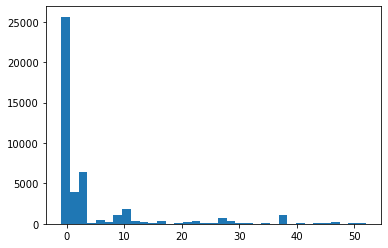

In [200]:
plt.hist(dbs.labels_,bins=35)

In [201]:
silhouette_score(Z,dbs.labels_)

-0.15663042535651794

In [116]:
dbs.labels_.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'

(40893, 3)
(3537, 3)
92.0 percent of earthquakes occur in these 53 clusters


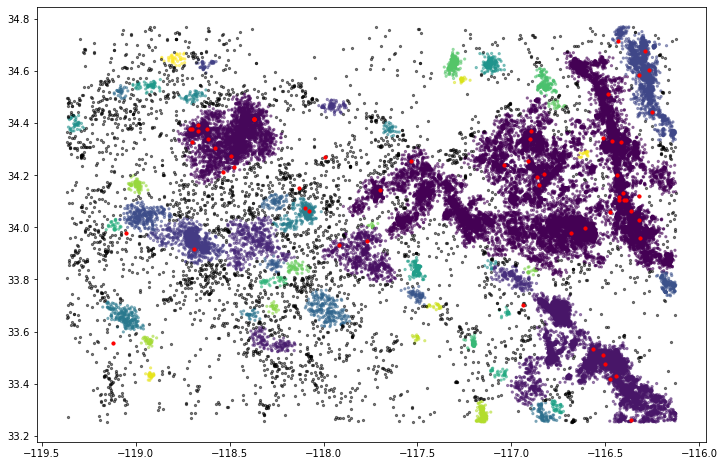

In [202]:
df['label'] = dbs.labels_
labeled = df[df['label']!=-1]
unlabeled = df[df['label']==-1]
plt.figure(figsize=(12,8))
plt.scatter(labeled['longitude'],labeled['latitude'],c=labeled['label'],s=5,alpha=0.5)
plt.scatter(unlabeled['longitude'],unlabeled['latitude'],c='k',s=5,alpha=0.5)
plt.scatter(big['longitude'],big['latitude'],c='r',s=10)

print(labeled.shape)
print(unlabeled.shape)
print(f"{round((labeled.shape[0]/df.shape[0])*100,1)} percent of earthquakes occur in these {labeled['label'].value_counts().shape[0]} clusters")

/Users/Sam/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


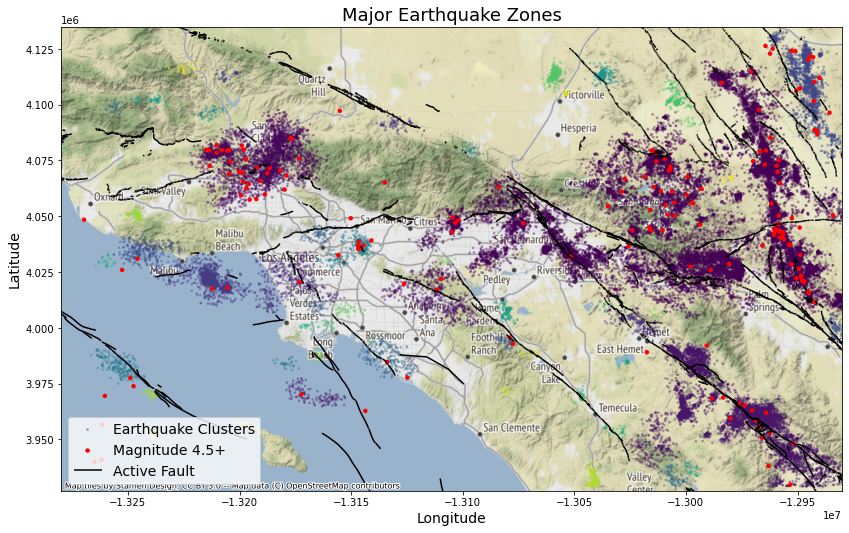

In [203]:
gdf = geopandas.GeoDataFrame(
    labeled, geometry=geopandas.points_from_xy(labeled.longitude, labeled.latitude))
gdf.crs = {'init' :'epsg:4326'}

locmag = geopandas.GeoDataFrame(
    locmag, geometry=geopandas.points_from_xy(locmag.longitude, locmag.latitude))
locmag.crs = {'init' :'epsg:4326'}

locmag = locmag.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)

base = gdf.plot(column='label',s=3,cmap='viridis',figsize=(14,10),alpha=0.3,label='Earthquake Clusters')
locmag[locmag['mag']>=4.5].plot(ax=base,marker='o',markersize=20,facecolor='r',edgecolor='None',label='Magnitude 4.5+')
plt.title('Major Earthquake Zones',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
ctx.add_basemap(base)
faults.plot(ax=base,color='k',label='Active Fault')
plt.xlim(-1.328e7,-1.293e7)
plt.ylim(3.927e6,4.135e6)
plt.legend(loc='lower left',fontsize=14)

In [204]:
df[df['label']!=-1]['label'].value_counts()[:5]

0     22090
3      6399
1      3384
11     1788
9      1043
Name: label, dtype: int64

In [184]:
df.head()

longitude   latitude  label
0 -116.446833  34.000000      0
1 -118.485500  34.300500      1
2 -117.657500  33.850833      2
3 -117.615500  34.385500     23
4 -116.919500  34.289500      0

In [231]:
cluster_lat = []
cluster_lon = []
cluster_label = []

for label in list(df[df['label']!=-1]['label'].value_counts().index):
    cluster_label.append(label)
    cluster_lat.append(df[df['label']==label]['latitude'].mean())
    cluster_lon.append(df[df['label']==label]['longitude'].mean())

centers = pd.DataFrame({'latitude':cluster_lat,'longitude':cluster_lon,'label':cluster_label})

centers = geopandas.GeoDataFrame(
    centers, geometry=geopandas.points_from_xy(centers.longitude, centers.latitude))
centers.crs = {'init' :'epsg:4326'}
centers = centers.to_crs(epsg=3857)

/Users/Sam/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


/Users/Sam/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


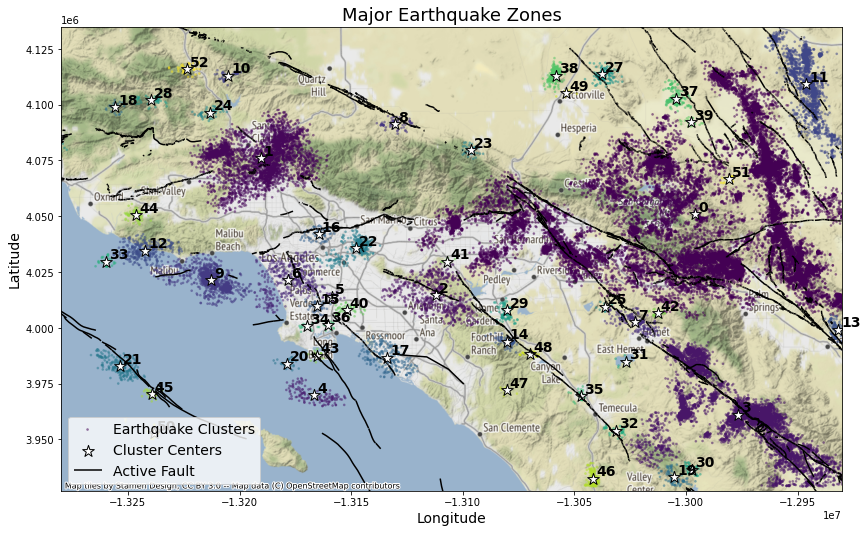

In [232]:
gdf = geopandas.GeoDataFrame(
    labeled, geometry=geopandas.points_from_xy(labeled.longitude, labeled.latitude))
gdf.crs = {'init' :'epsg:4326'}

locmag = geopandas.GeoDataFrame(
    locmag, geometry=geopandas.points_from_xy(locmag.longitude, locmag.latitude))
locmag.crs = {'init' :'epsg:4326'}

locmag = locmag.to_crs(epsg=3857)
gdf = gdf.to_crs(epsg=3857)

base = gdf.plot(column='label',s=3,cmap='viridis',figsize=(14,10),alpha=0.4,label='Earthquake Clusters')
centers.plot(ax=base,marker='*',markersize=150,facecolor='w',edgecolor='k',label='Cluster Centers')
plt.title('Major Earthquake Zones',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
ctx.add_basemap(base)
faults.plot(ax=base,color='k',label='Active Fault')
plt.xlim(-1.328e7,-1.293e7)
plt.ylim(3.927e6,4.135e6)
plt.legend(loc='lower left',fontsize=14)

for x, y, label in zip(centers.geometry.x, centers.geometry.y, centers.label):
    base.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",fontsize=14,fontweight='bold')

#### San Bernardino/Mojave Earthquake Zone

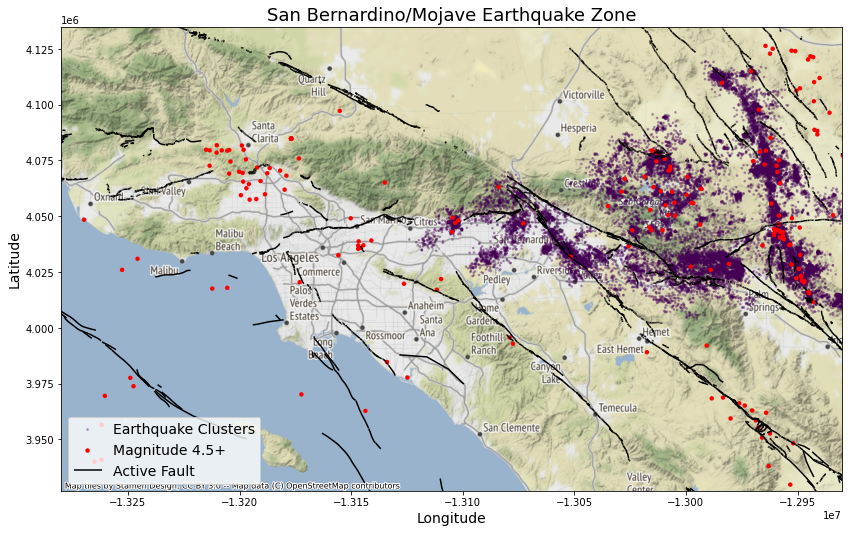

In [144]:
base = gdf[gdf['label']==0].plot(column='label',s=3,cmap='viridis',figsize=(14,10),alpha=0.3,label='Earthquake Clusters')
locmag[locmag['mag']>=4.5].plot(ax=base,marker='o',markersize=20,facecolor='r',edgecolor='None',label='Magnitude 4.5+')
plt.title('San Bernardino/Mojave Earthquake Zone',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
ctx.add_basemap(base)
faults.plot(ax=base,color='k',label='Active Fault')
plt.xlim(-1.328e7,-1.293e7)
plt.ylim(3.927e6,4.135e6)
plt.legend(loc='lower left',fontsize=14)

In [195]:
sbm = gdf[gdf['label']==0]

ss = StandardScaler()
Z = ss.fit_transform(sbm.drop(columns=['label','geometry']))

dbs2 = DBSCAN(eps = 0.15,min_samples=90)
dbs2.fit(Z)

DBSCAN(eps=0.15, min_samples=90)

<ipython-input-196-4ffe17386c0f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sbm['label2'] = dbs2.labels_


(21164, 5)
(926, 5)
95.8 percent of earthquakes occur in these 9 clusters


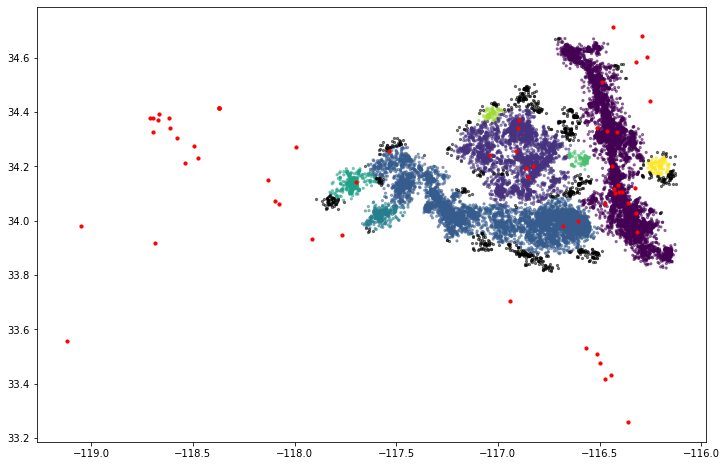

In [196]:
sbm['label2'] = dbs2.labels_
labeled = sbm[sbm['label2']!=-1]
unlabeled = sbm[sbm['label2']==-1]
plt.figure(figsize=(12,8))
plt.scatter(labeled['longitude'],labeled['latitude'],c=labeled['label2'],s=5,alpha=0.5)
plt.scatter(unlabeled['longitude'],unlabeled['latitude'],c='k',s=5,alpha=0.5)
plt.scatter(big['longitude'],big['latitude'],c='r',s=10)

print(labeled.shape)
print(unlabeled.shape)
print(f"{round((labeled.shape[0]/sbm.shape[0])*100,1)} percent of earthquakes occur in these {sbm['label2'].value_counts().shape[0]} clusters")

In [227]:
sbm['label2'].value_counts()

 0    9226
 2    6774
 1    3933
-1     926
 4     575
 3     326
 5     124
 7     122
 6      84
Name: label2, dtype: int64

In [229]:
cluster_lat = []
cluster_lon = []
cluster_label = []

for label in list(sbm[sbm['label2']!=-1]['label'].value_counts().index):
    cluster_label.append(label)
    cluster_lat.append(sbm[sbm['label2']==label]['latitude'].mean())
    cluster_lon.append(sbm[sbm['label2']==label]['longitude'].mean())

centers = pd.DataFrame({'latitude':cluster_lat,'longitude':cluster_lon,'label':cluster_label})

centers = geopandas.GeoDataFrame(
    centers, geometry=geopandas.points_from_xy(centers.longitude, centers.latitude))
centers.crs = {'init' :'epsg:4326'}
centers = centers.to_crs(epsg=3857)

/Users/Sam/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


In [226]:
base = gdf.plot(column='label',s=3,cmap='viridis',figsize=(14,10),alpha=0.3,label='Earthquake Clusters')
centers.plot(ax=base,marker='*',markersize=150,facecolor='w',edgecolor='k',label='Cluster Centers')
plt.title('Major Earthquake Zones',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
ctx.add_basemap(base)
faults.plot(ax=base,color='k',label='Active Fault')
plt.xlim(-1.328e7,-1.293e7)
plt.ylim(3.927e6,4.135e6)
plt.legend(loc='lower left',fontsize=14)

for x, y, label in zip(centers.geometry.x, centers.geometry.y, centers.label):
    base.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points",fontsize=14,fontweight='bold')

#### Rescan residuals for smaller clusters

In [79]:
dbs2 = DBSCAN(eps = 0.05,min_samples=30)
dbs2.fit(unlabeled.drop(columns='label'))

DBSCAN(eps=0.05, min_samples=30)

0.11728974490515658


(array([2537.,  195.,   58.,  301., 1441.,  268.,   87.,  241.,  259.,
         231.,  451.,  196.,   33.,   90.,  109.,  393.,   45.,  280.,
         116.,   96.,   74.,   31.,   31.,   63.,   60.,   80.,   44.,
          49.,   60.,   88.,  136.,   48.,   59.,   53.,   98.]),
 array([-1.        ,  0.17142857,  1.34285714,  2.51428571,  3.68571429,
         4.85714286,  6.02857143,  7.2       ,  8.37142857,  9.54285714,
        10.71428571, 11.88571429, 13.05714286, 14.22857143, 15.4       ,
        16.57142857, 17.74285714, 18.91428571, 20.08571429, 21.25714286,
        22.42857143, 23.6       , 24.77142857, 25.94285714, 27.11428571,
        28.28571429, 29.45714286, 30.62857143, 31.8       , 32.97142857,
        34.14285714, 35.31428571, 36.48571429, 37.65714286, 38.82857143,
        40.        ]),
 <a list of 35 Patch objects>)

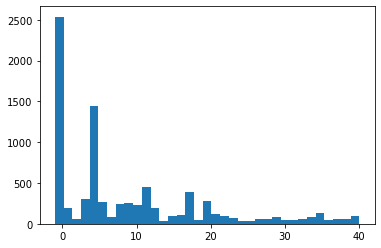

In [80]:
print(silhouette_score(unlabeled,dbs2.labels_))
plt.hist(dbs2.labels_,bins=35)

<ipython-input-83-687b65d1d60f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unlabeled['label2'] = dbs2.labels_


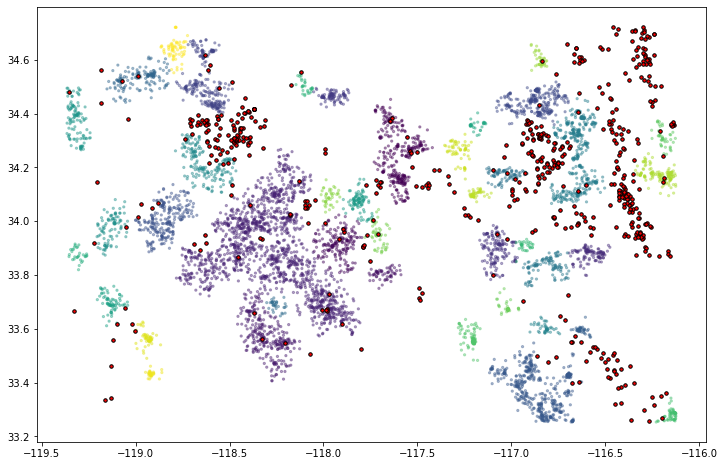

In [83]:
unlabeled['label2'] = dbs2.labels_
relabeled = unlabeled[unlabeled['label2']!=-1]
plt.figure(figsize=(12,8))
plt.scatter(relabeled['longitude'],relabeled['latitude'],c=relabeled['label2'],s=5,alpha=0.4)
plt.scatter(locmag[locmag['mag']>=4]['longitude'],locmag[locmag['mag']>=4]['latitude'],marker='o',facecolor='r',edgecolor='k',s=12)

In [51]:
gdf = geopandas.GeoDataFrame(
    labeled, geometry=geopandas.points_from_xy(labeled.longitude, labeled.latitude))
gdf.crs = {'init' :'epsg:4326'}

/Users/Sam/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


/Users/Sam/opt/anaconda3/envs/geo_env/lib/python3.8/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


(3927000.0, 4135000.0)

<Figure size 864x504 with 0 Axes>

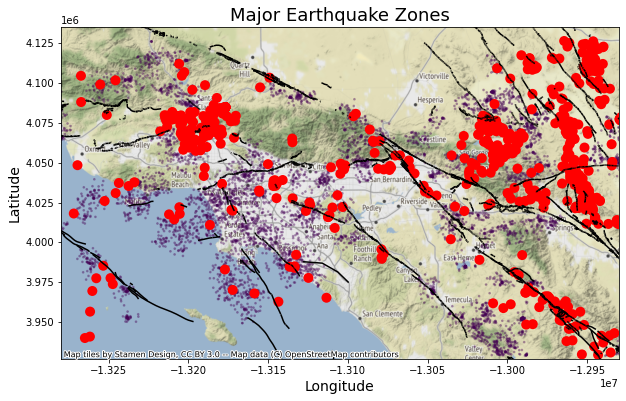

In [84]:
gdf2 = geopandas.GeoDataFrame(
    relabeled, geometry=geopandas.points_from_xy(relabeled.longitude, relabeled.latitude))
gdf2.crs = {'init' :'epsg:4326'}

gdf2 = gdf2.to_crs(epsg=3857)

plt.figure(figsize=(12,7))
base = gdf2.plot(column='label',s=3,cmap='viridis',figsize=(10,10),alpha=0.3)
locmag[locmag['mag']>=4].plot(ax=base,marker='o',markersize=100,facecolor='r',edgecolor='None',label='Magnitude 5+')
plt.title('Major Earthquake Zones',fontsize=18)
plt.xlabel('Longitude',fontsize=14)
plt.ylabel('Latitude',fontsize=14)
ctx.add_basemap(base)
faults.plot(ax=base,color='k',label='Active Fault')
plt.xlim(-1.328e7,-1.293e7)
plt.ylim(3.927e6,4.135e6)